In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [14]:
digital_revenue_pd = pd.read_csv('output/physical_vs_digital_revenue.csv')
marathon_counts_pd = pd.read_csv('output/marathon_counts_by_year.csv')
marathon_participants_pd = pd.read_csv('output/marathon_participants_by_race_by_year.csv')

In [21]:
marathon_counts_pd = marathon_counts_pd.loc[marathon_counts_pd['year'] < 2020]
marathon_participants_pd = marathon_participants_pd.loc[marathon_participants_pd['year'] < 2020]

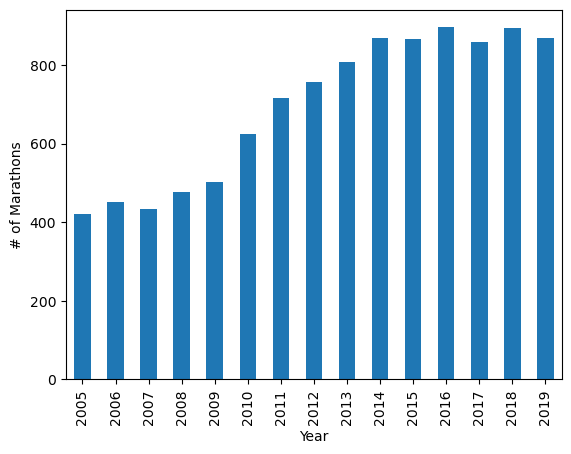

In [19]:
marathon_counts_pd.plot(kind="bar", x="year", y="marathon_count", legend=False)
plt.xlabel("Year")
plt.ylabel("# of Marathons")
plt.savefig("output/marathon_counts_by_year.png")
plt.show()

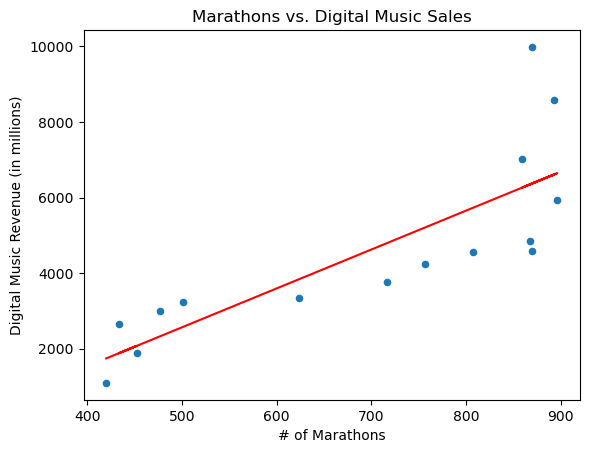

0.6487318371724573


In [20]:
marathon_revenue_pd = pd.merge(marathon_counts_pd, digital_revenue_pd, left_on="year", right_on="Year")

marathon_revenue_pd.plot(kind="scatter", x="marathon_count", y="Total Digital Revenue")
plt.xlabel("# of Marathons")
plt.ylabel("Digital Music Revenue (in millions)")
plt.title('Marathons vs. Digital Music Sales')

(slope, intercept, rvalue, pvalue, stderr) = linregress(marathon_revenue_pd['marathon_count'], marathon_revenue_pd['Total Digital Revenue'])
regress_values = marathon_revenue_pd['marathon_count'] * slope + intercept
plt.plot(marathon_revenue_pd['marathon_count'], regress_values, "r-")

plt.savefig("output/marathon_sales_scatter.png")
plt.show()

print(rvalue**2)

In [35]:
marathon_participants_by_year_pd = marathon_participants_pd.groupby('year')[['participant_count']].sum()
marathon_participants_by_year_pd

,participant_count
year,
2005,476240
2006,488472
2007,500228
2008,524658
2009,575229
2010,633535
2011,664706
2012,628339
2013,699009


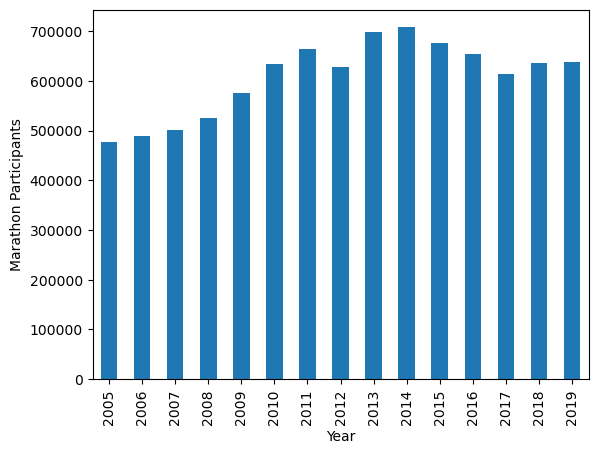

In [36]:
marathon_participants_by_year_pd = marathon_participants_pd.groupby('year')[['participant_count']].sum()
marathon_participants_by_year_pd.plot(kind="bar", legend=False)
plt.xlabel("Year")
plt.ylabel("Marathon Participants")
plt.savefig("output/marathon_participants_by_year.png")
plt.show()

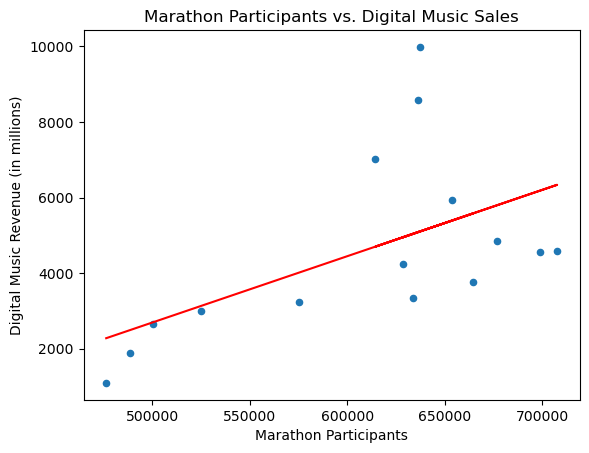

0.3054527448762023


In [30]:
marathon_participants_revenue_pd = pd.merge(marathon_participants_by_year_pd, digital_revenue_pd, left_on="year", right_on="Year")

marathon_participants_revenue_pd.plot(kind="scatter", x="participant_count", y="Total Digital Revenue")
plt.xlabel("Marathon Participants")
plt.ylabel("Digital Music Revenue (in millions)")
plt.title('Marathon Participants vs. Digital Music Sales')

(slope, intercept, rvalue, pvalue, stderr) = linregress(marathon_participants_revenue_pd['participant_count'], marathon_participants_revenue_pd['Total Digital Revenue'])
regress_values = marathon_participants_revenue_pd['participant_count'] * slope + intercept
plt.plot(marathon_participants_revenue_pd['participant_count'], regress_values, "r-")

plt.savefig("output/marathon_participant_sales_scatter.png")
plt.show()

print(rvalue**2)